# Predicción de tarifas de taxis

In [1]:
# Importando librerías

import pandas as pd
import numpy as np
import warnings
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ignoramos los futuros warnings
warnings.filterwarnings("ignore")

In [23]:
# Cargando datos

'''
    Aquí cada uno escribira su propia ruta para no subir el archivo dado que es demasiado pasado
'''

# Ruta de Danilo
#nombre_archivo ='../../PracticaCalificada2-CC421/train.csv'

# Ruta de Victor
#nombre_archivo ='D:/Nueva carpeta (4)/UNI-21-I/IA/PracticaCalificada2-CC421/PracticaCalificada2-CC421/train.csv'

#Ruta de William
nombre_archivo ='../train.csv'

# Cargando los datos
# Estoy usando una menor cantidad de data ya que mi hardware no soporta los 55 millones de datos y demora mucho varias veces 
# Si se desea trabajar con toda la data completa borrar nrows = 1000000  un millon de datos
df = pd.read_csv(nombre_archivo,nrows=4000000)

## 1. Análisis de Datos

In [4]:
# Visualización de los 30 primeros datos
df.head(30)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [24]:
# Cantidad de instancias y atributos (filas x columndas)

print("Cantidad de Instancias: "+str(df.shape[0]))
print("Cantidad de Atributos: "+str(df.shape[1]))

Cantidad de Instancias: 4000000
Cantidad de Atributos: 8


In [6]:
# Visualización de los tipos de datos del dataframe
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [25]:
# Descripción actual de algunas mediciones 
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,4.000000e+06,4.000000e+06,4.000000e+06,3.999971e+06,3.999971e+06,4.000000e+06
mean,1.134395e+01,-7.250844e+01,3.991910e+01,-7.250871e+01,3.991789e+01,1.684334e+00
std,9.824543e+00,1.312180e+01,8.797868e+00,1.289308e+01,9.716855e+00,1.329071e+00
min,-6.200000e+01,-3.426609e+03,-3.488080e+03,-3.412653e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399139e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396710e+01,4.076711e+01,-7.396366e+01,4.076812e+01,2.000000e+00
max,1.273310e+03,3.439426e+03,2.912465e+03,3.457622e+03,3.345917e+03,2.080000e+02


In [26]:
# Verificando la correlación de las caracteristicas

'''
    Nota: Necesitan ser trabajadas dando que hay mucha dependencia entre características y poca correlación
        con la característica a predecir.
'''

df.corr(method='pearson')

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.008354,-0.007080,0.009059,-0.006306,0.013072
pickup_longitude,0.008354,1.000000,-0.532956,0.695842,-0.475109,0.000851
pickup_latitude,-0.007080,-0.532956,1.000000,-0.541805,0.549416,-0.001443
dropoff_longitude,0.009059,0.695842,-0.541805,1.000000,-0.405849,0.001110
dropoff_latitude,-0.006306,-0.475109,0.549416,-0.405849,1.000000,-0.001340
passenger_count,0.013072,0.000851,-0.001443,0.001110,-0.001340,1.000000


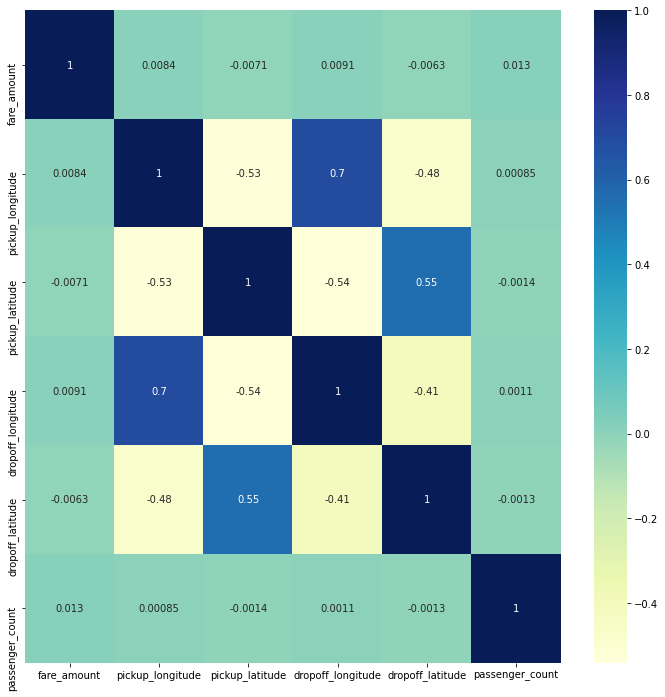

In [27]:
plt.figure(figsize=(12,12))

correlacion = df.corr(method='pearson')

sns.heatmap(correlacion, annot=True,  cmap="YlGnBu")
plt.show()

In [28]:
# Verificando la cantidad de datos corrompidos o nulos

df.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    29
dropoff_latitude     29
passenger_count       0
dtype: int64

In [29]:
df.sort_values('pickup_datetime')

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
880228,2009-01-01 00:00:46.0000002,15.0,2009-01-01 00:00:46 UTC,-73.953738,40.806762,-73.989427,40.769542,1
661006,2009-01-01 00:01:04.0000001,5.8,2009-01-01 00:01:04 UTC,-73.995133,40.734111,-73.998232,40.722874,2
3094958,2009-01-01 00:03:04.0000001,10.6,2009-01-01 00:03:04 UTC,-74.007669,40.742966,-73.980098,40.748366,4
2247283,2009-01-01 00:09:00.0000002,7.4,2009-01-01 00:09:00 UTC,-73.999446,40.743925,-73.992176,40.750398,2
2337970,2009-01-01 00:11:38.0000004,8.6,2009-01-01 00:11:38 UTC,-74.006026,40.723717,-73.979572,40.727317,1
...,...,...,...,...,...,...,...,...
785182,2015-06-30 23:53:49.0000003,7.5,2015-06-30 23:53:49 UTC,-73.959969,40.762405,-73.953064,40.782688,1
3211962,2015-06-30 23:55:51.0000007,6.5,2015-06-30 23:55:51 UTC,-74.010147,40.720520,-74.000557,40.727139,1
3088533,2015-06-30 23:56:00.0000001,20.0,2015-06-30 23:56:00 UTC,-73.970154,40.757011,-73.962608,40.708641,1
2031461,2015-06-30 23:56:50.0000001,14.5,2015-06-30 23:56:50 UTC,-73.992104,40.734531,-73.960335,40.775703,1


## 2. Procesamiento de Datos

In [30]:
# Eliminamos 'key' ya que esta característica no aporta información relevante
df.drop(columns=['key'], inplace=True)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.50,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.90,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.70,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.70,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.30,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
3999995,46.83,2014-03-24 07:33:57 UTC,-73.987998,40.763007,-73.864281,40.769958,1
3999996,14.00,2014-11-08 17:02:00 UTC,-74.007965,40.740327,-73.990090,40.756777,2
3999997,11.30,2009-05-17 00:23:31 UTC,-73.964203,40.764695,-73.983850,40.727210,1
3999998,4.50,2009-08-25 06:48:17 UTC,-74.003833,40.707497,-74.004392,40.716065,1


In [31]:
# Eliminaremos los datos nulos y duplicados dado que la cantidad de estos es insignificante para la población

df_new = df.drop_duplicates()
df_new.dropna(inplace=True)
df_new

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.50,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.90,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.70,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.70,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.30,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
3999995,46.83,2014-03-24 07:33:57 UTC,-73.987998,40.763007,-73.864281,40.769958,1
3999996,14.00,2014-11-08 17:02:00 UTC,-74.007965,40.740327,-73.990090,40.756777,2
3999997,11.30,2009-05-17 00:23:31 UTC,-73.964203,40.764695,-73.983850,40.727210,1
3999998,4.50,2009-08-25 06:48:17 UTC,-74.003833,40.707497,-74.004392,40.716065,1


In [207]:
'''
    Tareas:
    -Analizar las características individualmente, con el fin de saber si hay outliers, además se podría ver
    esto con gráficas de boxplot.
    -Actualmente las características no son buenas, la latitud y longitud podrían darnos nuevas características
    que sirvan mejor para las predicciones.
    -La característica datatime actualmente es de clase objeto podemos darle un mejor uso si dividimos en año y
    horas o como crean convenientes.
'''

'\n    Tareas:\n    -Analizar las características individualmente, con el fin de saber si hay outliers, además se podría ver\n    esto con gráficas de boxplot.\n    -Actualmente las características no son buenas, la latitud y longitud podrían darnos nuevas características\n    que sirvan mejor para las predicciones.\n    -La característica datatime actualmente es de clase objeto podemos darle un mejor uso si dividimos en año y\n    horas o como crean convenientes.\n'

## 3. Tratamiento de Datos

In [32]:
import datetime
##separamos los dias meses años y horas 
## Se cita https://stackoverflow.com/questions/53914889/extract-day-of-month-as-array-from-datetime-column

df_new['pickup_datetime'] = pd.to_datetime(df_new['pickup_datetime'], errors='coerce')
df_new['day']=df_new['pickup_datetime'].dt.day.values
df_new['month']=df_new['pickup_datetime'].dt.month.values
df_new['year']=df_new['pickup_datetime'].dt.year.values
df_new['hours']=df_new['pickup_datetime'].dt.hour.values



In [15]:

##observamos que hay pasajeros =0 , no deberia ocurrir
df_new.groupby("passenger_count")["passenger_count"].count()


passenger_count
0        3555
1      691344
2      148105
3       43765
4       21429
5       70595
6       21196
208         1
Name: passenger_count, dtype: int64

In [16]:

## limpiamos la data , especificamente cuendo hay pasajeros = 0

df_new2=df_new[(df_new["passenger_count"]> 0) & (df_new["passenger_count"] <=6)]
df_new3=df_new2[(df_new2["fare_amount"]> 2.0) & (df_new2["fare_amount"]<= 150.0)]
df_new4=df_new3[(df_new3["pickup_longitude"] !=0.0)] 
df_new4.reset_index(drop=True, inplace=True)
df_new4

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7
...,...,...,...,...,...,...,...,...,...,...,...
977541,7.0,2014-09-13 21:44:38+00:00,-73.976676,40.785630,-73.959196,40.775114,1,13,9,2014,21
977542,7.3,2010-09-20 14:50:37+00:00,-73.992103,40.671385,-73.992103,40.671385,2,20,9,2010,14
977543,10.5,2013-04-26 14:03:00+00:00,-73.978423,40.751135,-73.993397,40.762197,5,26,4,2013,14
977544,6.9,2011-07-08 00:29:00+00:00,-73.980317,40.759482,-73.976832,40.743122,1,8,7,2011,0


In [17]:
df_new4["fare_amount"]


0          4.5
1         16.9
2          5.7
3          7.7
4          5.3
          ... 
977541     7.0
977542     7.3
977543    10.5
977544     6.9
977545     4.1
Name: fare_amount, Length: 977546, dtype: float64

In [18]:
## Con la data ya mas limpia mostramos un resumen de los datos
df_new4.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours
count,977546.000000,977546.000000,977546.000000,977546.000000,977546.000000,977546.00000,977546.000000,977546.000000,977546.000000,977546.000000
mean,11.328396,-73.914686,40.693936,-73.854438,40.649233,1.69136,15.695562,6.269630,2011.741215,13.509229
std,9.547785,6.762698,4.263370,5.720663,6.245291,1.30664,8.681980,3.436508,1.865577,6.511958
min,2.500000,-3377.680935,-880.627428,-3383.296608,-3114.338567,1.00000,1.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992267,40.736523,-73.991559,40.735441,1.00000,8.000000,3.000000,2010.000000,9.000000
50%,8.500000,-73.982075,40.753382,-73.980558,40.753815,1.00000,16.000000,6.000000,2012.000000,14.000000
75%,12.500000,-73.968268,40.767561,-73.965183,40.768397,2.00000,23.000000,9.000000,2013.000000,19.000000
max,150.000000,2522.271325,2621.628430,45.581619,1651.553433,6.00000,31.000000,12.000000,2015.000000,23.000000


In [19]:
## Se cita https://stackoverflow.com/questions/27928/calculate-distance-between-two-latitude-longitude-points-haversine-formula
## Hallamos una distancia para poder aprovecharr la latitud y longitud y trabajar con la distancia
from math import radians,cos,sin,asin,atan2

def distance(lonx,lony,latx,laty):
    lonx =radians(lonx)
    lony =radians(lony)
    latx =radians(latx)
    laty =radians(laty)

    d_lon=abs((lony-lonx))
    d_lat=abs((laty-latx))
    a = sin(d_lat/2)**2+cos(latx)*cos(laty)*sin(d_lon/2)**2
    c = 2 * asin(a**(1/2))
    
    ##distancia William
    #a = sin(d_lat/2)**2+cos(latx)*cos(laty)*sin(d_lon/2)**2
    #a=sin(latx)*sin(laty)+(sin(latx)*sin(laty)*cos(d_lon))
    #c = 2 * atan2(a**(1/2),(1-a)**2)
    #r=6378.0
    #distancia=round(r*c,2)
    #return(distancia)
    
    distancia=round(6371*c,2)
    return(distancia)

    #a = sin(d_lat/2)**2+cos(latx)*cos(laty)*sin(d_lon/2)**2
    #a=sin(latx)*sin(laty)+(sin(latx)*sin(laty)*cos(d_lon))
    #c = 2 * atan2(a**(1/2),(1-a)**2)



dis=[]


for i in range(df_new4.shape[0]):
    dis.append(distance(df_new4["pickup_longitude"][i],
                        df_new4["dropoff_longitude"][i],
                        df_new4["pickup_latitude"][i],
                        df_new4["dropoff_latitude"][i]))


df_new4["distancia"] = dis
df_new4


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,hours,distancia
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,17,1.03
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,16,8.45
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,0,1.39
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,4,2.80
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,7,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...
977541,7.0,2014-09-13 21:44:38+00:00,-73.976676,40.785630,-73.959196,40.775114,1,13,9,2014,21,1.88
977542,7.3,2010-09-20 14:50:37+00:00,-73.992103,40.671385,-73.992103,40.671385,2,20,9,2010,14,0.00
977543,10.5,2013-04-26 14:03:00+00:00,-73.978423,40.751135,-73.993397,40.762197,5,26,4,2013,14,1.76
977544,6.9,2011-07-08 00:29:00+00:00,-73.980317,40.759482,-73.976832,40.743122,1,8,7,2011,0,1.84


In [20]:
# con esto vemos si alguna de nuestras columnas estan mal o salen de los parametros
df_new4.groupby("year")["year"].count() 

year
2009    152076
2010    147673
2011    153020
2012    156421
2013    153665
2014    146118
2015     68573
Name: year, dtype: int64

<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

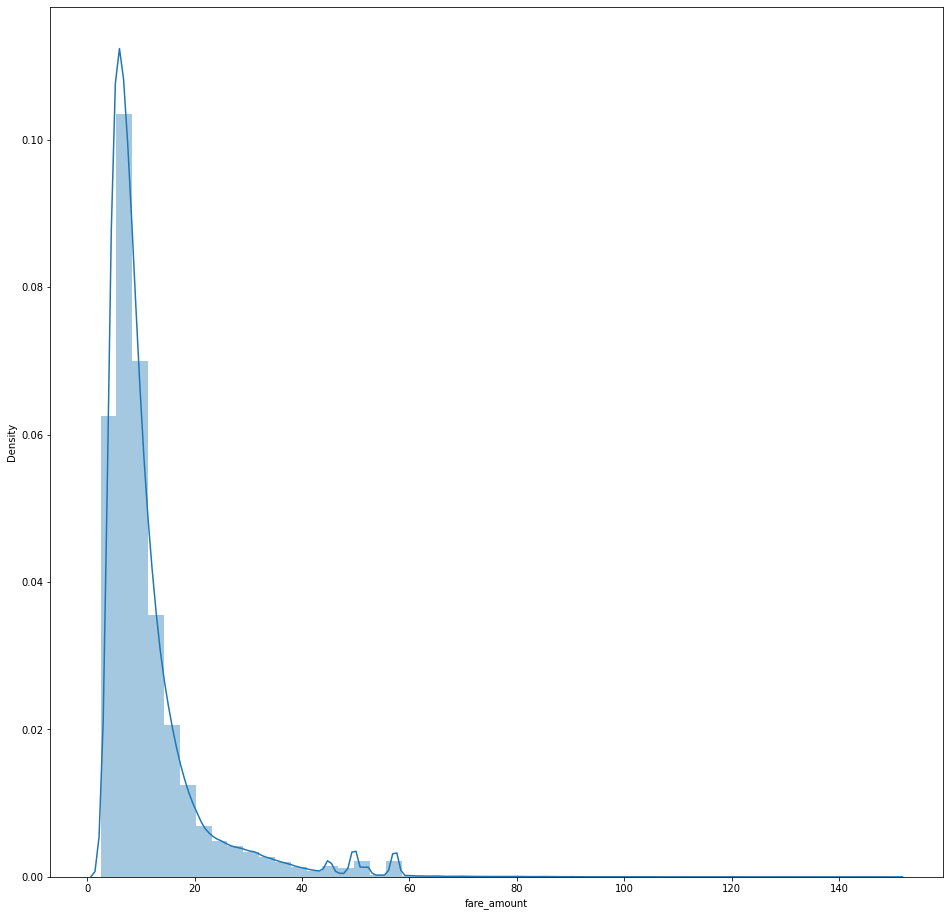

In [21]:
f, axes = plt.subplots(figsize = (16,16))
sns.distplot(df_new4['fare_amount'])

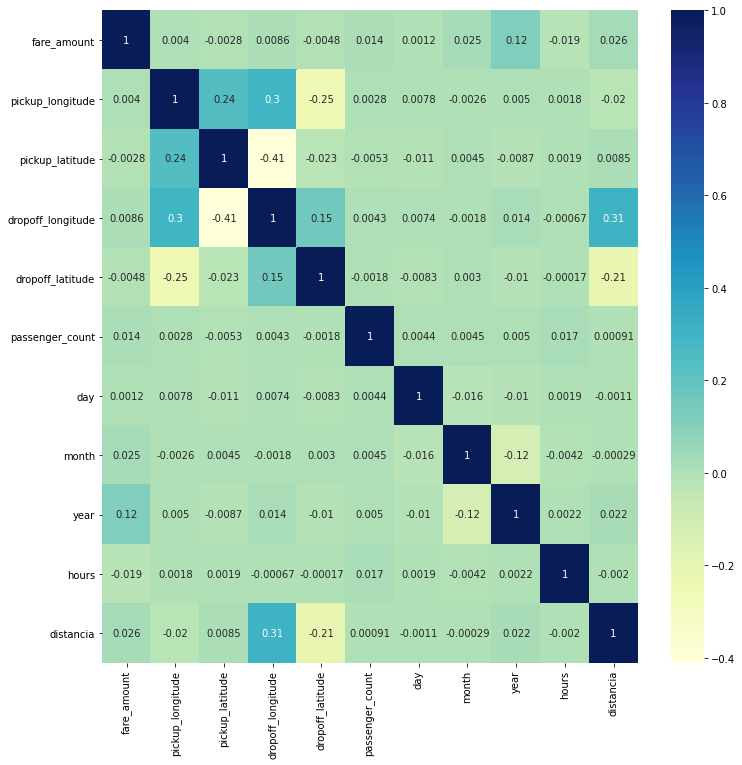

In [22]:
plt.figure(figsize=(12,12))

correlacion = df_new4.corr(method='pearson')

sns.heatmap(correlacion, annot=True,  cmap="YlGnBu")
plt.show()

## 4. Modelamiento

## 5. Optimización y forecasting